# AutoEncoder 노이즈 제거
---
- 데이터에 노이즈 제거 활용
- 데이터에서 주요 특징만 추출 압축하기 때문에 노이즈는 주요 특징에서 제거
- 압축된 주요 특징으로 데이터 복원 => 노이즈 제거

In [132]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D,Conv2DTranspose, Flatten, MaxPool2D,MaxPooling2D,Dropout
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [133]:
(x_train,y_train),(x_test,y_test) = load_data()

In [134]:
x_train = x_train/255
x_test = x_test/255

In [135]:
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

In [136]:
# 데이터셋에 노이즈 추가
# np.random.normal(평균loc =0.0, 표준편차scale=1.0, size=None)
x_train_noised = x_train + np.random.normal(0,0.5,size = x_train.shape)
x_test_noised = x_test + np.random.normal(0,0.5,size = x_test.shape)

# 픽셀범위 0.0 ~ 1.0 벗어나는 픽셀값 조정 no.clip(array, min, max)
x_train_noised = np.clip(x_train_noised, a_min = 0, a_max =1)
x_test_noised = np.clip(x_test_noised, a_min = 0, a_max =1)

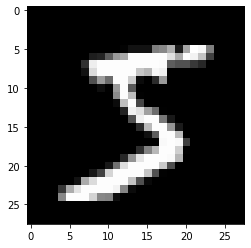

In [137]:
plt.imshow(x_train[0].reshape(28,28),cmap='gray')
plt.show()

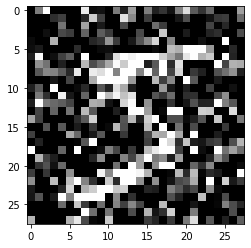

In [138]:
plt.imshow(x_train_noised[0].reshape(28,28),cmap='gray')
plt.show()

In [139]:
def createModel(n_node):
  model = Sequential()
  model.add(Dense(units = n_node, activation='relu', input_shape = (784,)))
  model.add(Dense(784, activation='sigmoid'))
  model.compile(loss = 'mean_squared_error',
                optimizer = 'adam')
  return model

In [140]:
Model10 = createModel(10)
Model50 = createModel(50)
Model100 = createModel(100)
Model500 = createModel(500)
Model1000 = createModel(1000)

# 노이즈, 노이즈 데이터로 학습 

In [141]:
Model10.fit(x_train_noised,x_train,epochs=1)
Model50.fit(x_train_noised,x_train,epochs=1)
Model100.fit(x_train_noised,x_train,epochs=1)
Model500.fit(x_train_noised,x_train,epochs=1)
Model1000.fit(x_train_noised,x_train,epochs=1)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0216


In [142]:
pre_out10 = Model10.predict(x_test_noised[0].reshape(-1,784))
pre_out50 = Model50.predict(x_test_noised[0].reshape(-1,784))
pre_out100 = Model100.predict(x_test_noised[0].reshape(-1,784))
pre_out500 = Model500.predict(x_test_noised[0].reshape(-1,784))
pre_out1000 = Model1000.predict(x_test_noised[0].reshape(-1,784))

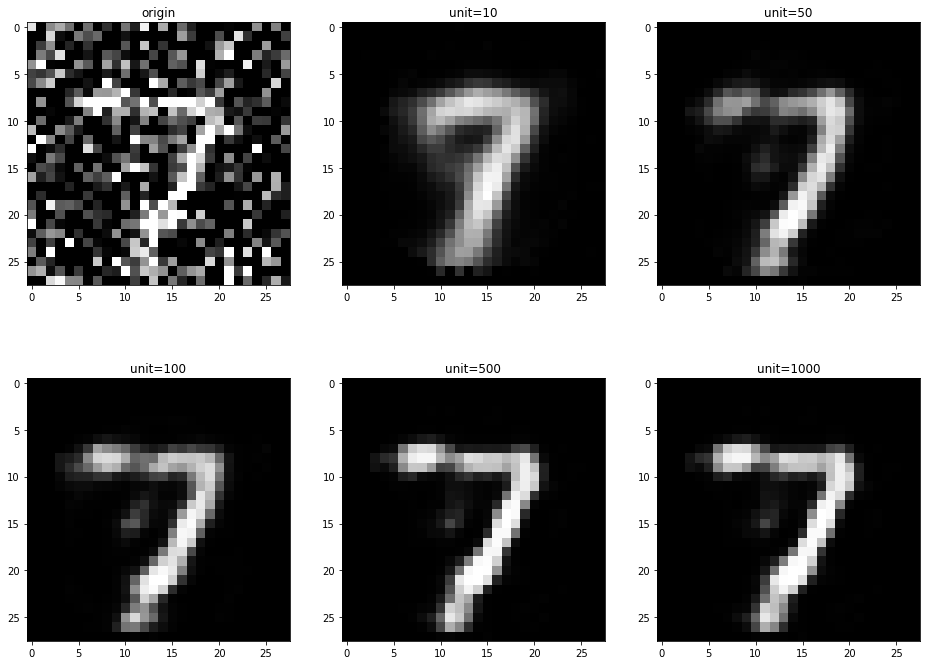

In [143]:
plt.figure(figsize=(16,12))

plt.subplot(2, 3, 1) 
plt.title('origin')
plt.imshow(x_test_noised[0].reshape(28,28),cmap='gray')

plt.subplot(2, 3, 2) 
plt.imshow(pre_out10.reshape(28,28),cmap ='gray')
plt.title('unit=10')

plt.subplot(2, 3, 3) 
plt.imshow(pre_out50.reshape(28,28),cmap ='gray')
plt.title('unit=50')

plt.subplot(2, 3, 4) 
plt.imshow(pre_out100.reshape(28,28),cmap ='gray')
plt.title('unit=100')

plt.subplot(2, 3, 5) 
plt.imshow(pre_out500.reshape(28,28),cmap ='gray')
plt.title('unit=500')

plt.subplot(2, 3, 6) 
plt.imshow(pre_out500.reshape(28,28),cmap ='gray')
plt.title('unit=1000')

plt.show()


# CNN으로 노이즈 제거

In [144]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
x_train_noised = x_train_noised.reshape(-1,28,28,1)
x_test_noised = x_test_noised.reshape(-1,28,28,1)

In [145]:
def createAE_cnn():
  model = Sequential()

  model.add(Conv2D(10,kernel_size = 3, 
                  padding = 'same', 
                  input_shape = (28,28,1),
                  activation = 'relu'))
  
  model.add(Conv2D(30,activation = 'relu',kernel_size = 3,padding = 'same'))

  model.add(Conv2D(1,activation = 'sigmoid',kernel_size = 3,padding = 'same'))

  model.compile(loss = 'mean_squared_error', 
              optimizer = 'adam')
  return model

In [146]:
model = createAE_cnn()
model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 10)        100       
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 30)        2730      
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 1)         271       
                                                                 
Total params: 3,101
Trainable params: 3,101
Non-trainable params: 0
_________________________________________________________________


In [147]:
x_train_noised.shape,x_train.shape

((60000, 28, 28, 1), (60000, 28, 28, 1))

In [148]:
model.fit(x_train_noised, x_train, epochs = 1)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.1130


In [149]:
preY = model.predict(x_test_noised[0])

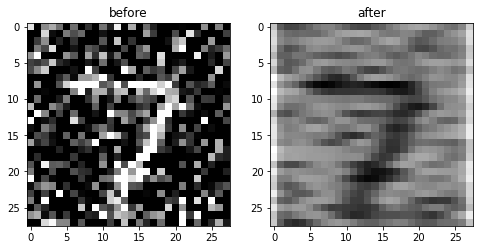

In [150]:
plt.figure(figsize=(8,6))

plt.subplot(1, 2, 1) 
plt.title('before')
plt.imshow(x_test_noised[0].reshape(28,28),cmap='gray')

plt.subplot(1, 2, 2) 
plt.title('after')
plt.imshow(preY.reshape(28,28),cmap ='gray')

plt.show()